# 统计分析模版：（更新完数据表都可以重新导入重跑，可以获得新的图表，寻找Business Insights）

## 环境创建

In [31]:
## Load function, Update Environment
import sys

!{sys.executable} -m pip install numpy
import numpy as np

!{sys.executable} -m pip install sklearn
from sklearn import metrics

!{sys.executable} -m pip install pandas
import pandas as pd

!{sys.executable} -m pip install nltk
import nltk

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from pprint import pprint
!{sys.executable} -m pip install pyLDAvis #visualizing LDA
import pyLDAvis
import pyLDAvis.lda_model

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 362, in run
    resolver = self.make_resolver(
               ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 177, in make_resolver
    return pip._internal.resolution.resolvelib.resolver.Resolver(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 58, in __init__
    self.factory = Factory(
                  

In [32]:
#Connect to My Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# Define the text normalization function
%run "/content/drive/MyDrive/lilysilk/Preprocessing_Text_Normalization_Functions.ipynb"

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Original:   <p>The circus dog in a plissé skirt jumped over Japson who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Japson', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Japson who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Japson who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Japson who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('japson', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
# Load the dataset
comments = pd.read_csv("/content/drive/MyDrive/lilysilk/Data/translated_comments_emoji (1).csv")
comments.head()

,publish_number,publish_url,video_id,text_display,like_count,published_at,likes,translated_text,emoji_column,text_column
0,LSYT2328,https://www.youtube.com/watch?v=oHg-pvBMjb4&t=42s,oHg-pvBMjb4,"Beautiful haul, Irene. The purple top is so pr...",0,8/7/22 18:02,77,"Beautiful haul, Irene. The purple top is so pr...",NaN,"Beautiful haul, Irene. The purple top is so pr..."
1,LSYT2328,https://www.youtube.com/watch?v=oHg-pvBMjb4&t=42s,oHg-pvBMjb4,"Beautiful pieces you got, love Lilysilk, can\'...",1,8/7/22 6:35,77,"Beautiful pieces you got, love Lilysilk, can\'...",NaN,"Beautiful pieces you got, love Lilysilk, can\'..."
2,LSYT2328,https://www.youtube.com/watch?v=oHg-pvBMjb4&t=42s,oHg-pvBMjb4,Congrats on your haul Irene. Lily silk packagi...,0,8/9/22 17:14,77,Congrats on your haul Irene. Lily silk packagi...,:smiling_face_with_heart-eyes::brown_heart::pu...,Congrats on your haul Irene. Lily silk packagi...
3,LSYT2328,https://www.youtube.com/watch?v=oHg-pvBMjb4&t=42s,oHg-pvBMjb4,Congratulations Irene the calvi card holder is...,0,8/7/22 4:36,77,Congratulations Irene the calvi card holder is...,:star-struck::purple_heart:,Congratulations Irene the calvi card holder is...
4,LSYT2328,https://www.youtube.com/watch?v=oHg-pvBMjb4&t=42s,oHg-pvBMjb4,Fab video. I love the calvi I use it load I ha...,0,8/8/22 21:35,77,Fab video. I love the calvi I use it load I ha...,:smiling_face_with_heart-eyes:,Fab video. I love the calvi I use it load I ha...


# 针对每一个Comments进行***统计学数据分析***：
## 这一个part里面需要投入的数据是对于每一个视频的每一条评论的展开

### 单个评论点赞数分布情况

In [35]:
#计算每个 like_count 的出现次数
like_counts = comments.like_count.value_counts()
# 计算每个 like_count 的比例
like_percentage = like_counts / like_counts.sum() * 100
# 将两者合并成一个 DataFrame
likecount_df = pd.DataFrame({
    'count': like_counts,
    'percentage': like_percentage
})

# 根据 like_count 排序
likecount_df = likecount_df.sort_values(by='count', ascending=False)
likecount_df.head(55)

,count,percentage
like_count,,
0,5306,53.06
1,2110,21.10
2,898,8.98
3,487,4.87
4,273,2.73
5,176,1.76
6,142,1.42
7,97,0.97
8,69,0.69


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['percentage'].plot(kind='hist', bins=20, title='percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='count', y='percentage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['percentage'].plot(kind='line', figsize=(8, 4), title='percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

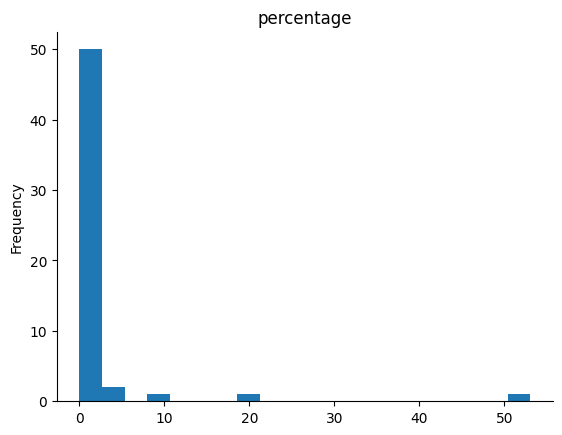

In [67]:
from matplotlib import pyplot as plt
_df_1['percentage'].plot(kind='hist', bins=20, title='percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

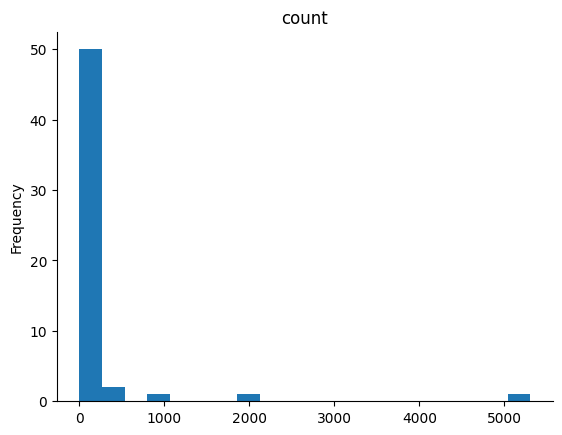

In [66]:
from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

列表解释：
*   "count" 表示了每个like_count出现的次数。这个数据表示不同点赞数的评论数量。通过数据可以直观的看到对于每一条评论，0个点赞或者1个点赞是比较常见的现象。
*   同时：“Percentage” 表示每个lik_count在所有评论中所占的百分比。



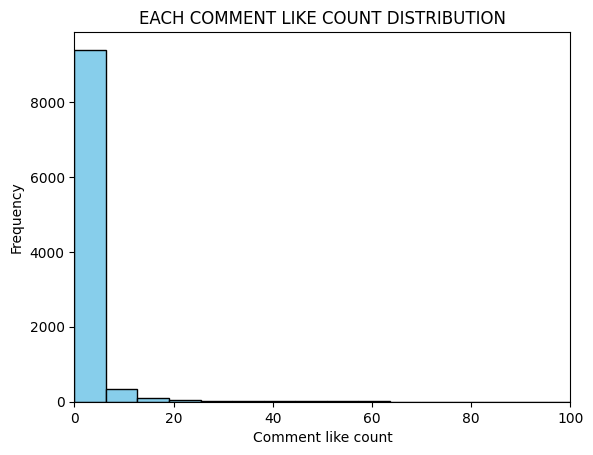

In [36]:
## Histogram shows the distribution of like_count
import matplotlib.pyplot as plt
comments['like_count'].plot(kind='hist',bins=50,color='skyblue',edgecolor='black')
plt.title('EACH COMMENT LIKE COUNT DISTRIBUTION')
plt.xlabel('Comment like count')
plt.ylabel('Frequency')
plt.xlim(0,100)
plt.show()

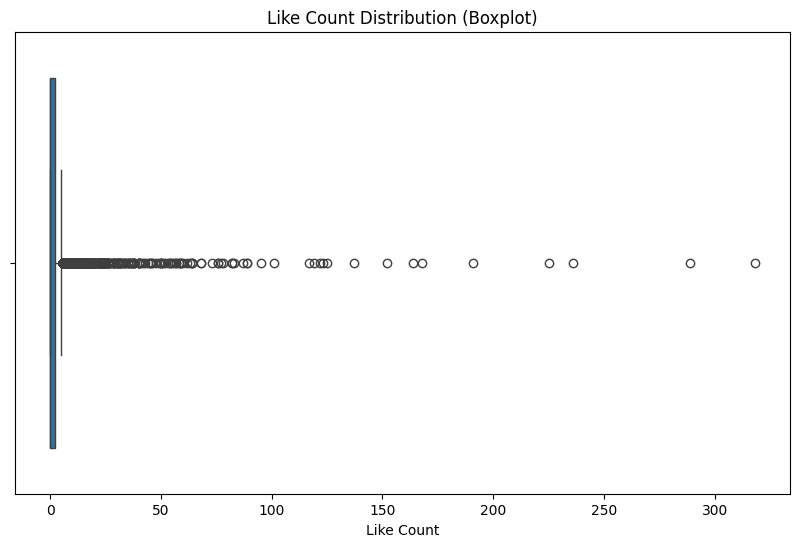

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=comments['like_count'])
plt.title('Like Count Distribution (Boxplot)')
plt.xlabel('Like Count')
plt.show()

### 不同点赞数量的百分比占比情况

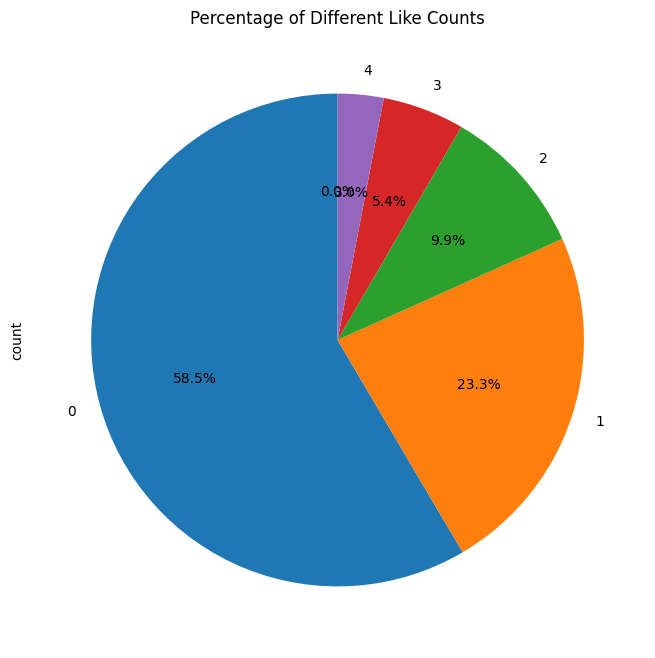

In [38]:
## Pie chart shows the percentage of different like counts
import matplotlib.pyplot as plt

like_counts_percentage = like_counts / like_counts.sum() * 100

# 合并小部分为“其他”
threshold = 2  # 合并2%以下的部分
like_counts_percentage[like_counts_percentage < threshold] = 0
other = like_counts_percentage[like_counts_percentage == 0].sum()
like_counts_percentage = like_counts_percentage[like_counts_percentage > 0]
like_counts_percentage['Other'] = other

plt.figure(figsize=(8,8))
like_counts_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False)
plt.title('Percentage of Different Like Counts')

plt.show()

### 每个评论的点赞数按照不同日期分布的流线图

点赞数与评论时间的相关性: 查看 like_counts 和 comment_time 之间是否存在某种关系。例如，是否较早的评论获得的点赞数更多。

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36190 (\N{CJK UNIFIED IDEOGRAPH-8D5E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35780 (\N{CJK UNIFIED IDEOGRAPH-8BC4}) missing from font(s) DejaVu Sans.
  fig.canvas

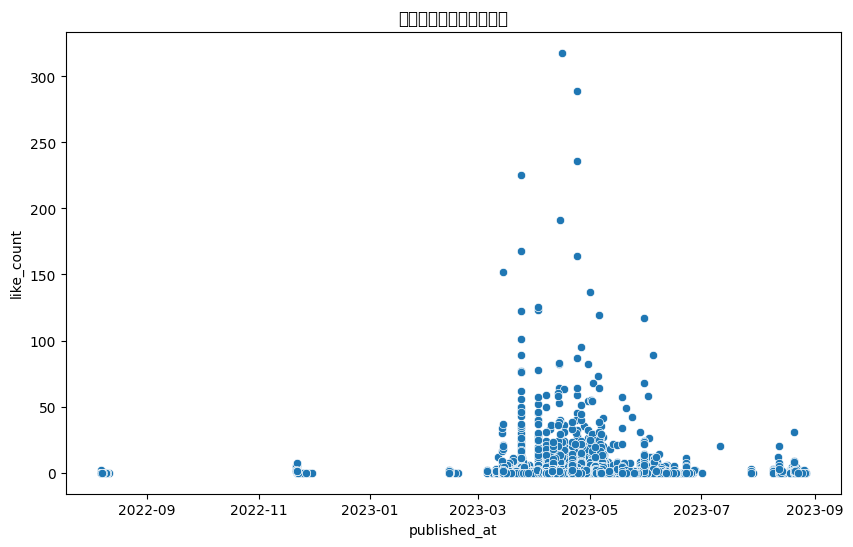

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算每条评论的发布时间与点赞数的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(x='published_at', y='like_count', data=comments)
plt.title("点赞数与评论时间的关系")
plt.show()

<ipython-input-39-96badd3887c3>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  comments['published_date'] = pd.to_datetime(comments['published_at'])


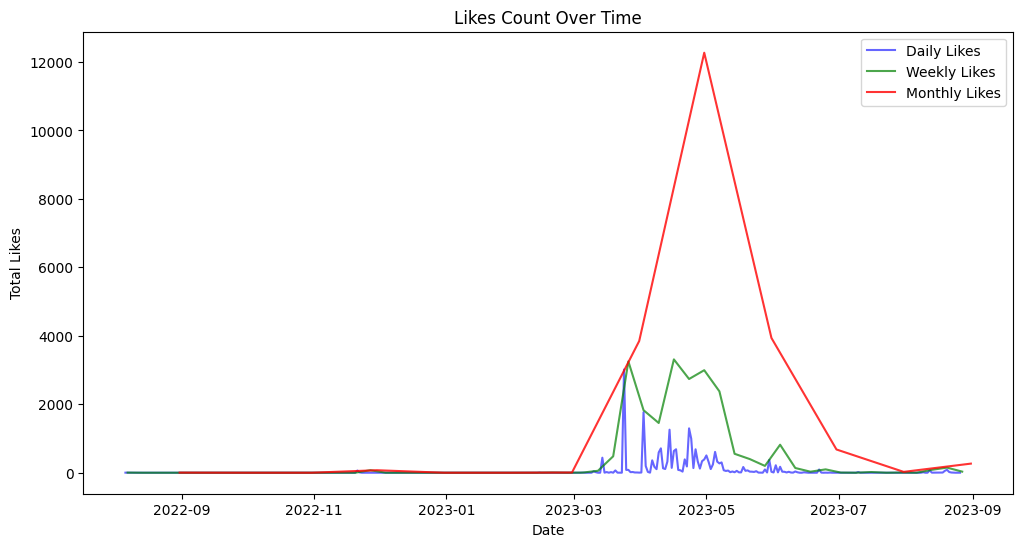

In [39]:
## Shows the like counts over time
import pandas as pd
import matplotlib.pyplot as plt

# 转换 'published_at' 为日期格式
comments['published_date'] = pd.to_datetime(comments['published_at'])
# 设置时间列为索引
comments.set_index('published_date', inplace=True)
# 按天/周/月分组
daily_likes = comments.resample('D')['like_count'].sum()  # 按天分组
weekly_likes = comments.resample('W')['like_count'].sum()  # 按周分组
monthly_likes = comments.resample('M')['like_count'].sum()  # 按月分组


plt.figure(figsize=(12,6))
# 绘制按天、周和月的点赞数
plt.plot(daily_likes, label='Daily Likes', color='blue', alpha=0.6)
plt.plot(weekly_likes, label='Weekly Likes', color='green', alpha=0.7)
plt.plot(monthly_likes, label='Monthly Likes', color='red', alpha=0.8)

plt.title('Likes Count Over Time')
plt.xlabel('Date')
plt.ylabel('Total Likes')
plt.legend()
plt.show()

# 针对每一个视频进行***统计学数据分析***：
## 这一个part里面需要投入的数据是对于每一个视频的数据整合：

针对每个视频分析：

每个视频的点赞数统计量，如均值、中位数、最大值和最小值：

In [40]:
# 视频点赞数统计
like_stats = comments.groupby('publish_number')['likes'].describe()
print(like_stats)

               count unique    top freq
publish_number                         
LSYT2328          48      1     77   48
LSYT2657          66      1    766   66
LSYT2984          16      1    113   16
LSYT3013          44      1   1642   44
LSYT3082         209      1   3906  209
...              ...    ...    ...  ...
LSYT3850          83      1   1408   83
LSYT3852         145      1  21513  145
LSYT3854          11      1    366   11
LSYT3856          34      1    455   34
LSYT3860         235      1   4338  235

[175 rows x 4 columns]


In [41]:
# 总点赞数量统计
# 转换列为数字类型
comments['like_count'] = pd.to_numeric(comments['like_count'], errors='coerce')  # 如果无法转换，会变成 NaN
comments['likes'] = pd.to_numeric(comments['likes'], errors='coerce')  # 同样的处理
# 然后进行加法操作
comments['total_likes'] = comments.groupby('publish_number')['like_count'].transform('sum') + comments['likes']
total_like_stats = comments.groupby('publish_number')['total_likes'].describe()
print(total_like_stats)

                count     mean  std      min      25%      50%      75%  \
publish_number                                                            
LSYT2328         48.0     80.0  0.0     80.0     80.0     80.0     80.0   
LSYT2657         66.0    839.0  0.0    839.0    839.0    839.0    839.0   
LSYT2984         16.0    156.0  0.0    156.0    156.0    156.0    156.0   
LSYT3013         44.0   1692.0  0.0   1692.0   1692.0   1692.0   1692.0   
LSYT3082        209.0   4218.0  0.0   4218.0   4218.0   4218.0   4218.0   
...               ...      ...  ...      ...      ...      ...      ...   
LSYT3850         83.0   1816.0  0.0   1816.0   1816.0   1816.0   1816.0   
LSYT3852        145.0  21778.0  0.0  21778.0  21778.0  21778.0  21778.0   
LSYT3854         11.0    372.0  0.0    372.0    372.0    372.0    372.0   
LSYT3856         34.0    493.0  0.0    493.0    493.0    493.0    493.0   
LSYT3860        235.0   4653.0  0.0   4653.0   4653.0   4653.0   4653.0   

                    max 

In [42]:
## 转换成dataframe
videolike_df = comments.groupby('publish_number').agg(
    total_video_likes=('total_likes','max'),
    published_at=('published_at', 'first')  # 保留每个视频的第一个 published_at
).reset_index()
print(videolike_df)

    publish_number  total_video_likes    published_at
0         LSYT2328               80.0    8/7/22 18:02
1         LSYT2657              839.0  11/23/22 10:43
2         LSYT2984              156.0   4/23/23 15:24
3         LSYT3013             1692.0    5/2/23 10:07
4         LSYT3082             4218.0   4/23/23 12:18
..             ...                ...             ...
170       LSYT3850             1816.0    5/30/23 9:46
171       LSYT3852            21778.0    5/21/23 4:30
172       LSYT3854              372.0     6/8/23 9:03
173       LSYT3856              493.0   6/11/23 21:10
174       LSYT3860             4653.0    4/21/23 7:14

[175 rows x 3 columns]


In [43]:
videolike_df['total_video_likes'].describe()

,total_video_likes
count,164.000000
mean,2167.658537
std,8631.159506
min,1.000000
25%,233.000000
50%,512.000000
75%,1789.000000
max,106695.000000


#### 视频总体点赞量分布图

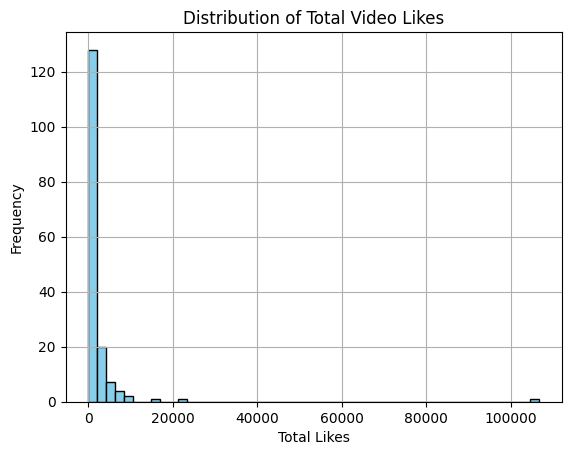

In [44]:
## Distribution
import matplotlib.pyplot as plt
videolike_df['total_video_likes'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Video Likes')
plt.xlabel('Total Likes')
plt.ylabel('Frequency')
plt.show()

#### 视频总体点赞量的趋势分析

<ipython-input-45-ffbbe29b7e6a>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  videolike_df['published_at'] = pd.to_datetime(videolike_df['published_at'])


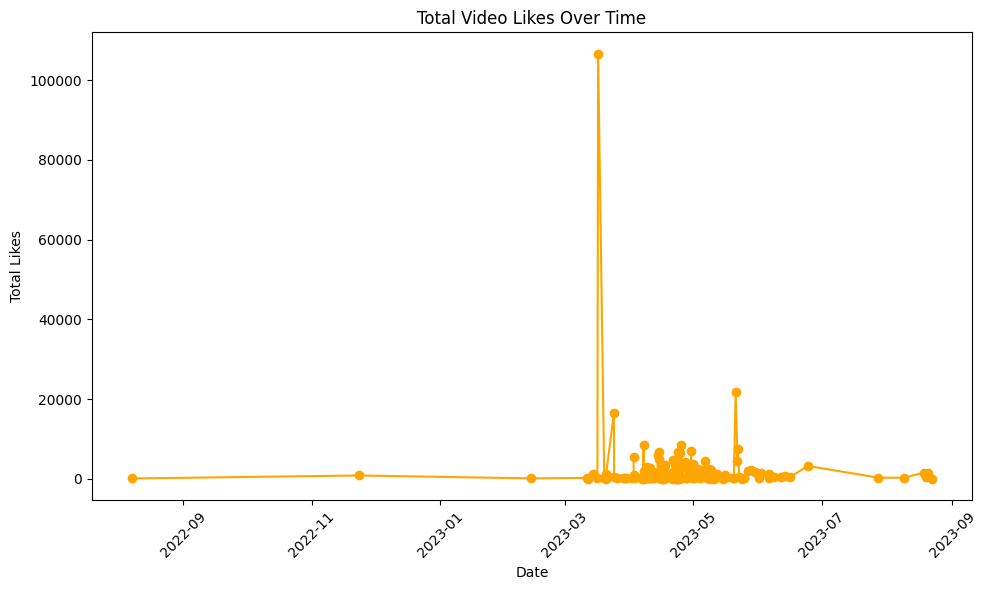

In [45]:
## trend analysis（趋势分析）
# 转换日期格式，确保 'published_at' 列是 datetime 类型
videolike_df['published_at'] = pd.to_datetime(videolike_df['published_at'])
# 按照时间顺序查看每个视频的总点赞数
videolike_df_sorted = videolike_df.sort_values('published_at')
# 绘制时间序列图
plt.figure(figsize=(10, 6))
plt.plot(videolike_df_sorted['published_at'], videolike_df_sorted['total_video_likes'], marker='o', color='orange')
plt.title('Total Video Likes Over Time')
plt.xlabel('Date')
plt.ylabel('Total Likes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 视频的聚类分析

In [46]:
## 聚类分析
# 计算点赞数的平均值
avg_likes = videolike_df['total_video_likes'].mean()
# 将视频分为三类：低、中、高
videolike_df['like_category'] = videolike_df['total_video_likes'].apply(lambda x: 'Low' if x < avg_likes else ('High' if x > 1.5*avg_likes else 'Medium'))
# 查看每个类别的频数
print(videolike_df['like_category'].value_counts())


like_category
Low       130
Medium     24
High       21
Name: count, dtype: int64


#### 视频发布时间和点数的关系（以第一个发布评论时间设为视频时间）

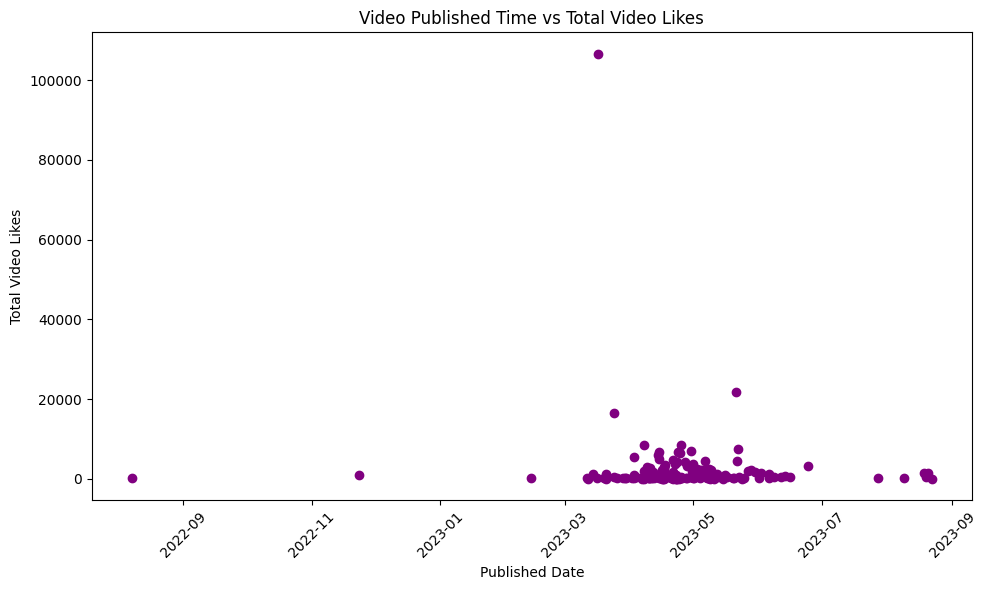

In [47]:
## 视频发布时间和点数的关系
plt.figure(figsize=(10, 6))
plt.scatter(videolike_df['published_at'], videolike_df['total_video_likes'], color='purple')
plt.title('Video Published Time vs Total Video Likes')
plt.xlabel('Published Date')
plt.ylabel('Total Video Likes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Time-series analysis（时间分析）：评论时间为一个时间戳，分析评论的发布时间分布：看每一个视频段落的发布时间区间

In [48]:
# 将评论时间转化为 datetime 类型
comments['published_at'] = pd.to_datetime(comments['published_at'])
# 按视频分组，查看每个视频的评论时间范围（最早时间和最晚时间）
comment_time_range = comments.groupby('publish_number')['published_at'].agg(['min', 'max'])
print(comment_time_range)

<ipython-input-48-1b66fe8501dc>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  comments['published_at'] = pd.to_datetime(comments['published_at'])


                               min                 max
publish_number                                        
LSYT2328       2022-08-06 22:03:00 2023-04-05 11:30:00
LSYT2657       2022-11-21 17:26:00 2022-11-30 01:58:00
LSYT2984       2023-04-22 19:03:00 2023-04-26 03:38:00
LSYT3013       2023-04-24 08:51:00 2023-05-09 03:18:00
LSYT3082       2023-04-23 11:06:00 2023-05-01 07:32:00
...                            ...                 ...
LSYT3850       2023-05-30 09:46:00 2023-06-07 03:20:00
LSYT3852       2023-05-18 08:12:00 2023-05-27 14:22:00
LSYT3854       2023-06-08 09:03:00 2023-06-13 13:52:00
LSYT3856       2023-06-11 20:34:00 2023-06-20 04:57:00
LSYT3860       2023-04-20 23:56:00 2023-04-28 23:51:00

[175 rows x 2 columns]


# 结合分析：（结合对于单个评论的分析和关注于整体视频的分析）

## 视频互动性趋势：视频发布时的互动性和评论：
通过时间序列的方式查看视频发布后，评论数和点赞数的变化。通过这个分析，可以观察到视频发布后的互动性趋势，帮助识别视频发布后的高峰期，以及是否存在影响视频互动性的时间点。

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


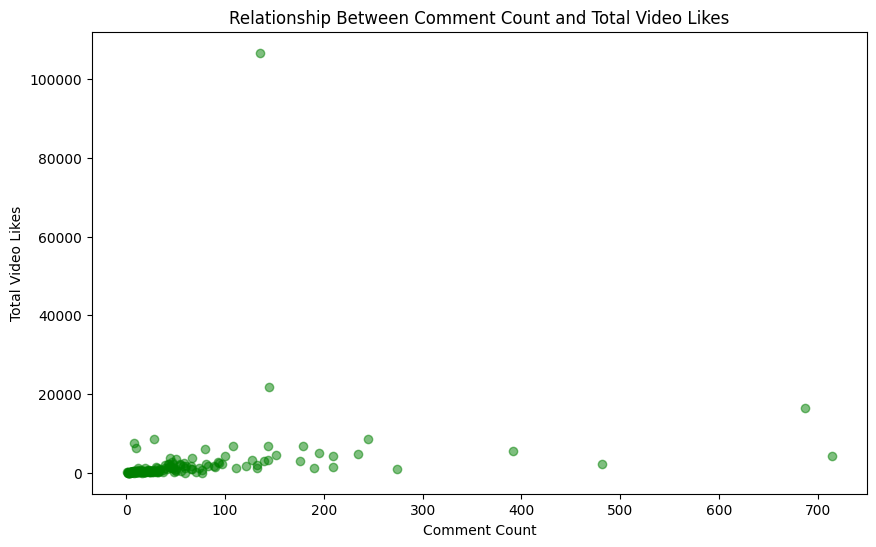

In [24]:
# 计算每个视频的评论数
comment_count_per_video = comments.groupby('publish_number')['text_display'].count()

# 合并videolike_df和评论数
videolike_df['comment_count'] = videolike_df['publish_number'].map(comment_count_per_video)

# 绘制评论数与点赞数的关系
plt.figure(figsize=(10, 6))
plt.scatter(videolike_df['comment_count'], videolike_df['total_video_likes'], color='green', alpha=0.5)
plt.title('Relationship Between Comment Count and Total Video Likes')
plt.xlabel('Comment Count')
plt.ylabel('Total Video Likes')
plt.show()

## 点赞数时间变化：视频发布后点赞数的增长趋势
使用时间序列分析方法，可以查看视频在发布后的点赞数变化。这可以帮助了解视频是否在某个特定时间段内获得了更多关注或互动。

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


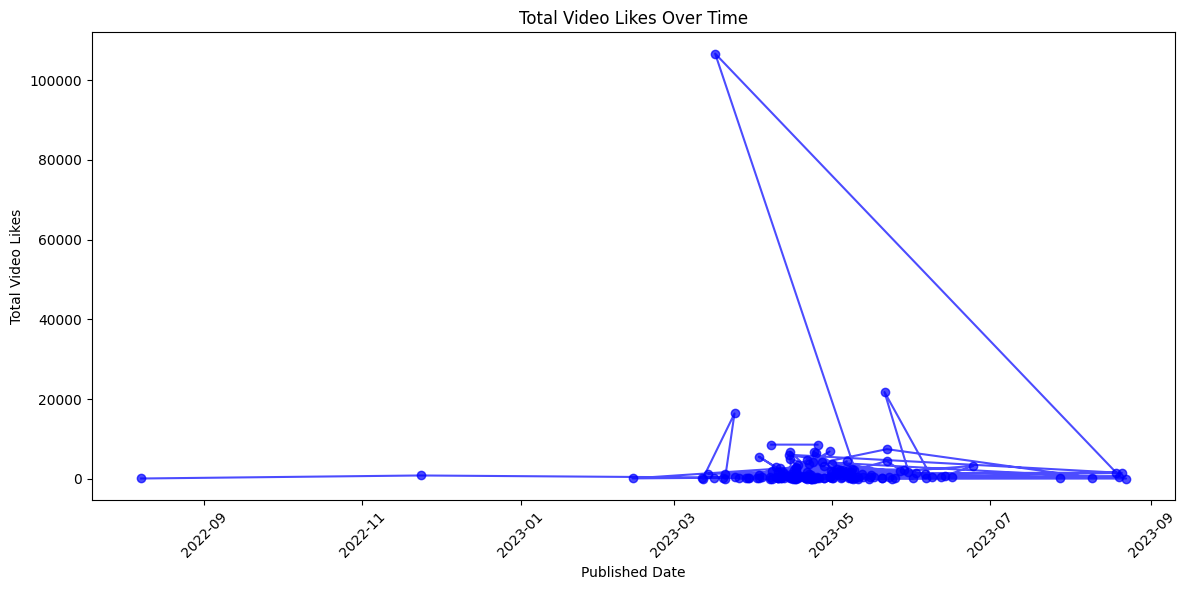

In [25]:
# 按照发布日期绘制点赞数的变化趋势
videolike_df['published_at'] = pd.to_datetime(videolike_df['published_at'])
plt.figure(figsize=(12, 6))
plt.plot(videolike_df['published_at'], videolike_df['total_video_likes'], marker='o', color='blue', alpha=0.7)
plt.title('Total Video Likes Over Time')
plt.xlabel('Published Date')
plt.ylabel('Total Video Likes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 评论时间与点赞数的关系
分析每个评论的发布时间和点赞数的关系，查看评论的发布时间是否影响点赞数的多少。

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


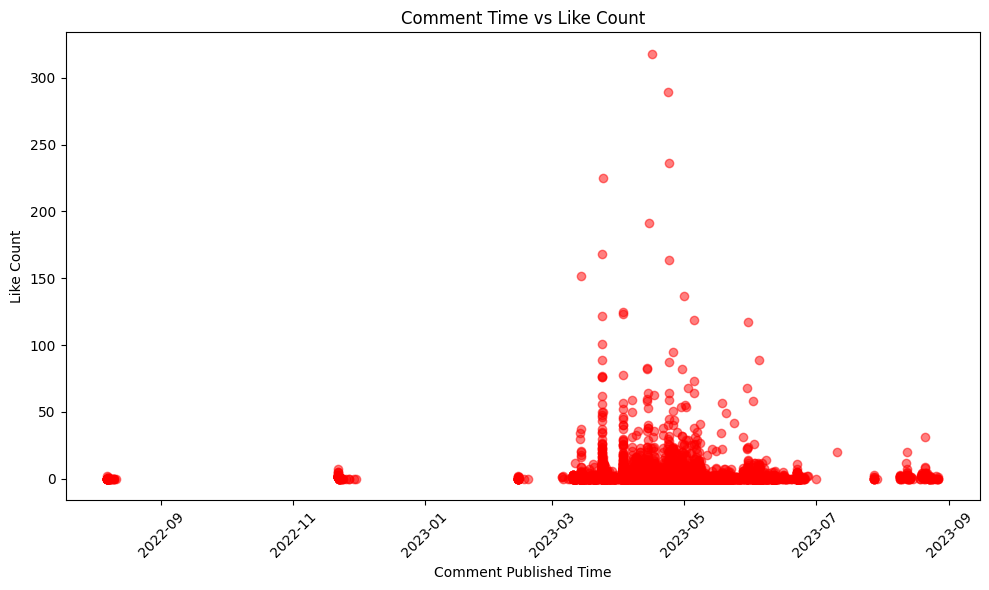

In [26]:
# 转换评论时间为datetime格式
comments['published_at'] = pd.to_datetime(comments['published_at'])

# 绘制评论时间与点赞数的关系
plt.figure(figsize=(10, 6))
plt.scatter(comments['published_at'], comments['like_count'], color='red', alpha=0.5)
plt.title('Comment Time vs Like Count')
plt.xlabel('Comment Published Time')
plt.ylabel('Like Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 评论频率与互动性
研究评论频率对视频互动性的影响。通过对视频评论频率和点赞数的分析，可以了解视频是否因为频繁的评论而受到更多关注。

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


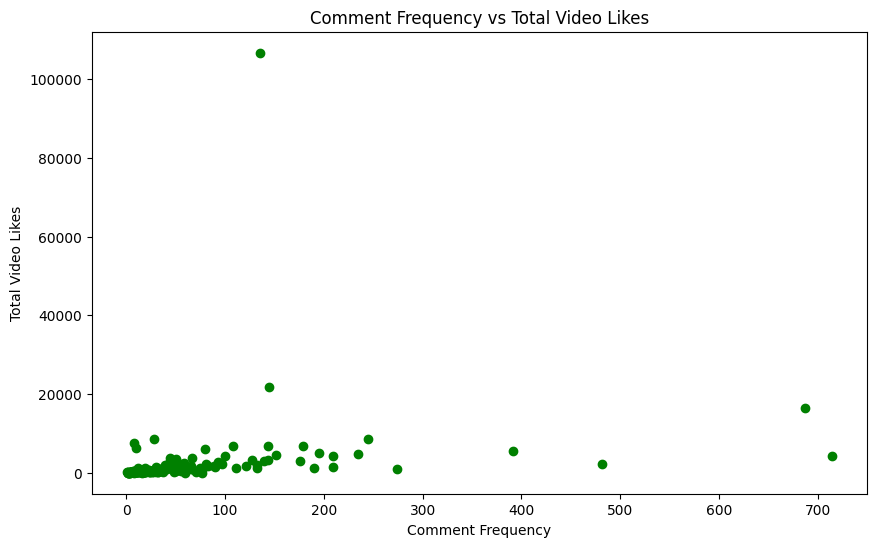

In [28]:
# 计算每个视频的评论频率
comment_frequency = comments.groupby('publish_number')['published_at'].count()

# 绘制评论频率与点赞数的关系
videolike_df['comment_frequency'] = videolike_df['publish_number'].map(comment_frequency)
plt.figure(figsize=(10, 6))
plt.scatter(videolike_df['comment_frequency'], videolike_df['total_video_likes'], color='green')
plt.title('Comment Frequency vs Total Video Likes')
plt.xlabel('Comment Frequency')
plt.ylabel('Total Video Likes')
plt.show()

## Top-Performing Videos Analysis (基于点赞数的高性能视频分析)
可以根据 total_video_likes 排名，分析最受欢迎的视频及其相关特征。通过查看最受欢迎的视频，可以得出哪些因素（如发布时间、视频内容等）可能与更高的互动性相关。

In [29]:
# 按照点赞数排序
top_performing_videos = videolike_df.sort_values('total_video_likes', ascending=False).head(10)
print(top_performing_videos)

    publish_number  total_video_likes        published_at like_category  \
37        LSYT3458           106695.0 2023-03-16 22:22:00          High   
171       LSYT3852            21778.0 2023-05-21 04:30:00          High   
21        LSYT3403            16396.0 2023-03-24 09:23:00          High   
59        LSYT3521             8583.0 2023-04-07 12:37:00          High   
60        LSYT3535             8574.0 2023-04-25 09:06:00          High   
164       LSYT3840             7445.0 2023-05-22 02:23:00          High   
104       LSYT3633             6861.0 2023-04-30 00:50:00          High   
42        LSYT3482             6794.0 2023-04-24 00:13:00          High   
75        LSYT3554             6764.0 2023-04-14 20:44:00          High   
68        LSYT3546             6390.0 2023-04-24 22:54:00          High   

     comment_count  comment_frequency  
37             135                135  
171            145                145  
21             687                687  
59            

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 评论互动性：评论文本情感分析
使用情感分析技术（如VADER，TextBlob等）来分析评论内容的情感分布。分析正面、负面或中立情感的评论与点赞数的关系。可以通过词云等方式展示常见的评论关键词，帮助分析视频的观众情绪。

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


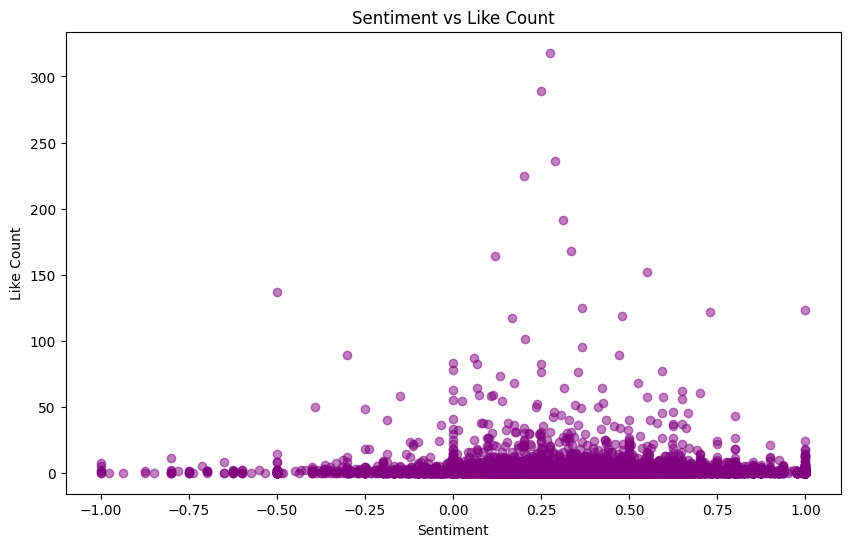

In [30]:
from textblob import TextBlob
# 处理缺失值，将NaN替换为空字符串
comments['text_column'] = comments['text_column'].fillna('')
# 确保text_column列是字符串类型
comments['text_column'] = comments['text_column'].astype(str)
# 对评论进行情感分析
comments['sentiment'] = comments['text_column'].apply(lambda x: TextBlob(x).sentiment.polarity)

# 绘制情感分析结果与点赞数的关系
plt.figure(figsize=(10, 6))
plt.scatter(comments['sentiment'], comments['like_count'], color='purple', alpha=0.5)
plt.title('Sentiment vs Like Count')
plt.xlabel('Sentiment')
plt.ylabel('Like Count')
plt.show()

##### 情感分析heatmap
热力图可以显示情感的分布，用于查看情感分布在不同条件下的变化。这里目前根据 sentiment（情感得分）和 like_count（点赞数）来展示情感与点赞数的关系。

1. 情感分析指数排名前十的视频热力图展现：

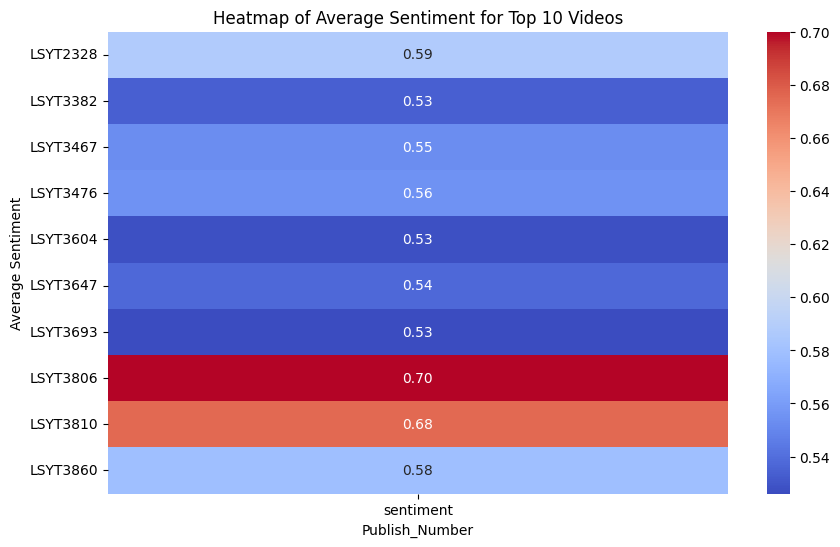

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

# 处理缺失值，将NaN替换为空字符串
comments['text_column'] = comments['text_column'].fillna('')
# 确保text_column列是字符串类型
comments['text_column'] = comments['text_column'].astype(str)
# 对评论进行情感分析
comments['sentiment'] = comments['text_column'].apply(lambda x: TextBlob(x).sentiment.polarity)

# 计算每个视频的情感均值
video_sentiment_df = comments.groupby('publish_number')['sentiment'].mean().reset_index()

# 选择排名前10的视频进行展示
top_videos = video_sentiment_df.nlargest(10, 'sentiment')

# 绘制top 10视频的情感热力图
plt.figure(figsize=(10, 6))
sns.heatmap(top_videos.pivot_table(index='publish_number', values='sentiment'), cmap="coolwarm", annot=True, fmt=".2f", cbar=True)
plt.title('Heatmap of Average Sentiment for Top 10 Videos')
plt.xlabel('Publish_Number')
plt.ylabel('Average Sentiment')
plt.show()

2. 根据 点赞数量 来对评论进行分组 展现不同点赞数区间下的情感变化：

根据点赞数量将数据分为几个区间：

低点赞（0-10）
中等点赞（11-50）
高点赞（50+）

<Figure size 1000x600 with 0 Axes>

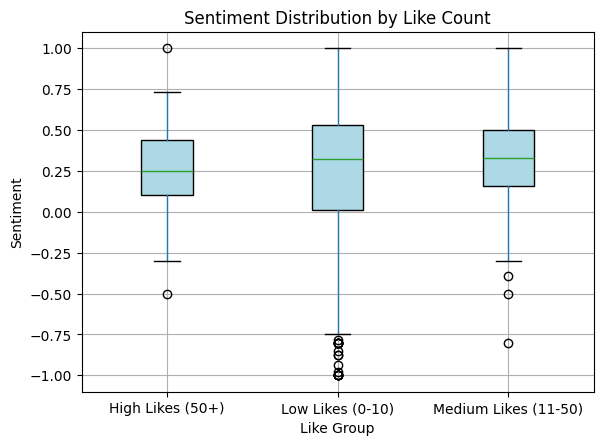

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# 处理缺失值，将NaN替换为空字符串
comments['text_column'] = comments['text_column'].fillna('')
# 确保text_column列是字符串类型
comments['text_column'] = comments['text_column'].astype(str)
# 对评论进行情感分析
comments['sentiment'] = comments['text_column'].apply(lambda x: TextBlob(x).sentiment.polarity)

# 根据点赞数分组
def categorize_like_count(like_count):
    if like_count <= 10:
        return 'Low Likes (0-10)'
    elif 11 <= like_count <= 50:
        return 'Medium Likes (11-50)'
    else:
        return 'High Likes (50+)'

comments['like_group'] = comments['like_count'].apply(categorize_like_count)

# 绘制每个点赞区间的情感分析分布
plt.figure(figsize=(10, 6))
comments.boxplot(column='sentiment', by='like_group', patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Sentiment Distribution by Like Count')
plt.suptitle('')
plt.xlabel('Like Group')
plt.ylabel('Sentiment')
plt.show()

这个热力图将展示每个点赞数区间的 平均情感分数，你将能够看到不同点赞数区间的情感分布，分析哪些点赞区间的评论情感更积极或消极。

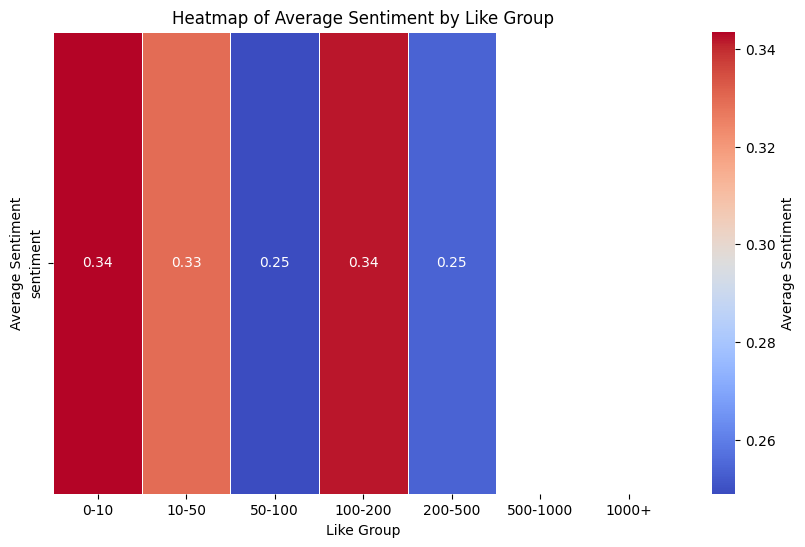

In [56]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# 处理缺失值，将NaN替换为空字符串
comments['text_column'] = comments['text_column'].fillna('')
# 确保text_column列是字符串类型
comments['text_column'] = comments['text_column'].astype(str)
# 对评论进行情感分析
comments['sentiment'] = comments['text_column'].apply(lambda x: TextBlob(x).sentiment.polarity)

# 根据点赞数分组
def categorize_like_count(like_count):
    if like_count <= 10:
        return 'Low Likes (0-10)'
    elif 11 <= like_count <= 50:
        return 'Medium Likes (11-50)'
    else:
        return 'High Likes (50+)'


comments['like_group'] = pd.cut(comments['like_count'], bins=[0, 10, 50, 100, 200, 500, 1000, 10000], labels=['0-10', '10-50', '50-100', '100-200', '200-500', '500-1000', '1000+'])

# 计算每个点赞数区间内的平均情感分数
like_group_sentiment = comments.groupby('like_group')['sentiment'].mean().reset_index()

# 绘制热力图
heatmap_data = like_group_sentiment.set_index('like_group')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.T, annot=True, cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Average Sentiment'})
plt.title('Heatmap of Average Sentiment by Like Group')
plt.xlabel('Like Group')
plt.ylabel('Average Sentiment')
plt.show()


##### 情感分析的频率分布
绘制情感得分（sentiment）的分布，查看评论中的情感是偏正面还是偏负面

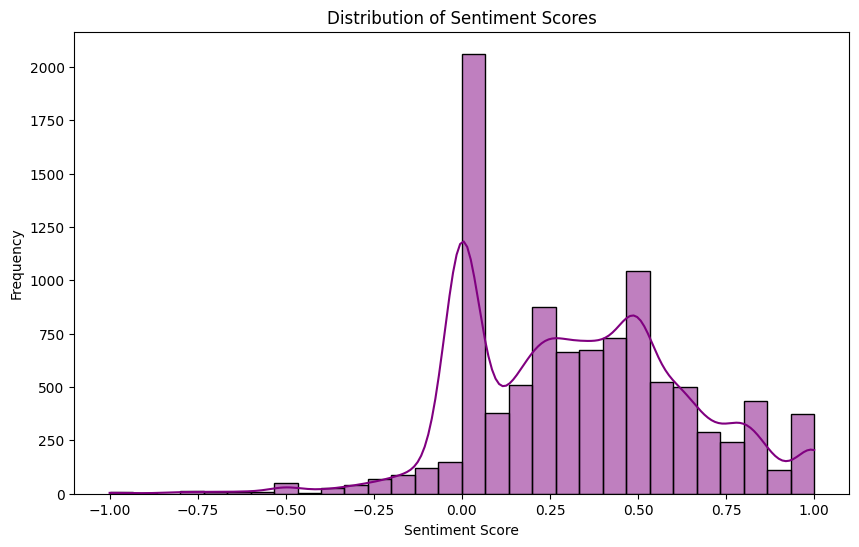

In [57]:
# 绘制情感得分的频率分布
plt.figure(figsize=(10, 6))
sns.histplot(comments['sentiment'], kde=True, bins=30, color='purple')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

##### 情感与点赞数的scatter plot（散点图）
根据已经绘制了的情感与点赞数的散点图，可以通过加上颜色映射或点大小变化，来进一步突出不同情感得分区间的评论。

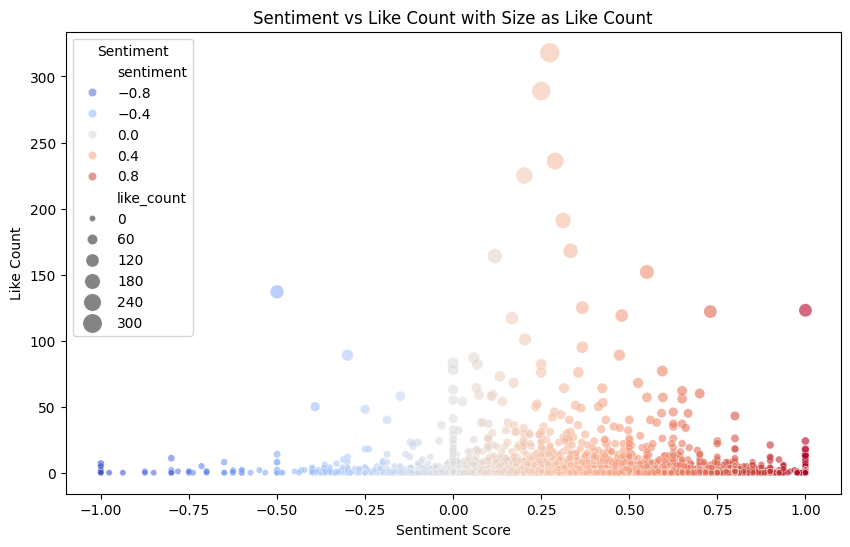

In [58]:
# 绘制情感与点赞数的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(data=comments, x='sentiment', y='like_count', hue='sentiment', size='like_count', sizes=(20, 200), palette='coolwarm', alpha=0.6)
plt.title('Sentiment vs Like Count with Size as Like Count')
plt.xlabel('Sentiment Score')
plt.ylabel('Like Count')
plt.legend(title='Sentiment')
plt.show()


##### 情感&视频



###### Sentiment Analysis & Video Engagement:

对于每个视频，可以分析视频的整体情感得分与视频本身的点赞数（likes）的关系。可以将每个视频的情感得分与其总的互动数（包括点赞和评论）进行比较，找出哪些情感得分较高的视频获得了更多的互动。

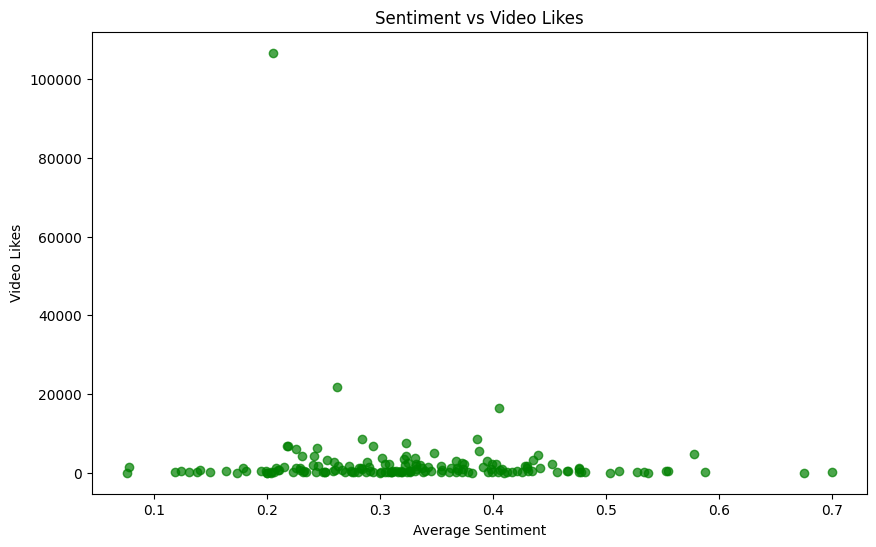

In [61]:
video_sentiment = comments.groupby('publish_number')['sentiment'].mean().reset_index()
video_likes = comments.groupby('publish_number')['total_likes'].max().reset_index()

# 合并情感得分和视频点赞数
video_sentiment_likes = pd.merge(video_sentiment, video_likes, on='publish_number')

# 绘制情感得分与视频点赞数的关系
plt.figure(figsize=(10, 6))
plt.scatter(video_sentiment_likes['sentiment'], video_sentiment_likes['total_likes'], alpha=0.7, color='green')
plt.title('Sentiment vs Video Likes')
plt.xlabel('Average Sentiment')
plt.ylabel('Video Likes')
plt.show()

###### 情感得分的排名分析 (Ranking Analysis based on Sentiment)

可以根据每个视频的情感得分进行排名，并结合其他变量（例如视频的总点赞数）来评估哪个视频的表现最佳。

In [70]:
# 排序视频，按情感得分排名
ranked_videos = video_sentiment_likes.sort_values(by='sentiment', ascending=False)

# 展示排名前10的视频
ranked_videos.head(10)

,publish_number,sentiment,total_likes
147,LSYT3806,0.700000,90.0
150,LSYT3810,0.675161,2.0
0,LSYT2328,0.587503,80.0
174,LSYT3860,0.578501,4653.0
40,LSYT3476,0.555261,498.0
39,LSYT3467,0.553036,410.0
108,LSYT3647,0.537500,8.0
16,LSYT3382,0.534015,95.0
94,LSYT3604,0.527867,74.0
117,LSYT3693,0.526042,NaN


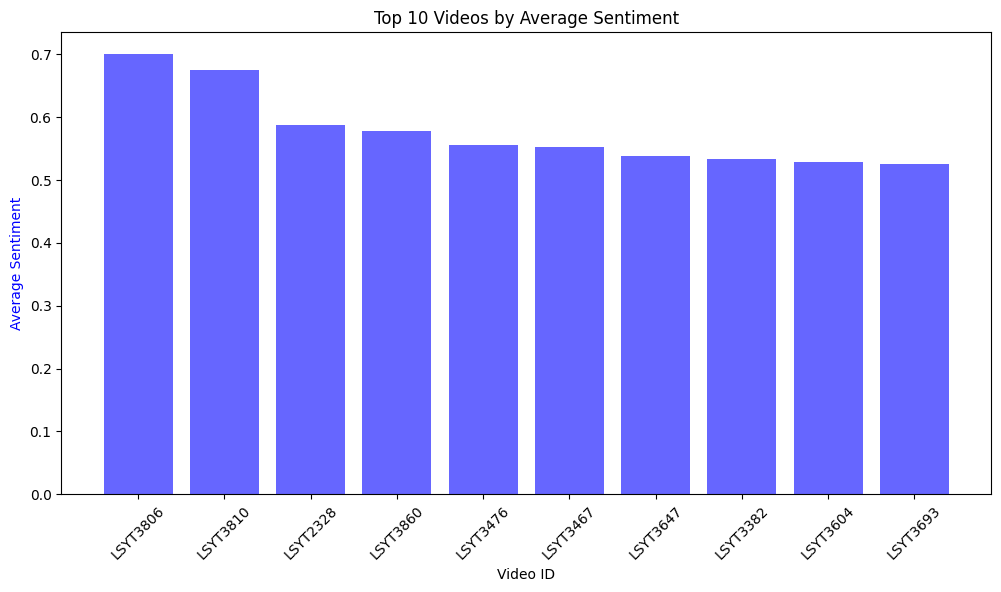

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设你已经有一个包含视频情感得分和点赞数的 DataFrame（例如：`video_sentiment_likes`）
# 先计算每个视频的平均情感得分和最大的视频点赞数

# 排序视频，按情感得分排名
ranked_videos = video_sentiment_likes.sort_values(by='sentiment', ascending=False)

# 选择前10个视频
top_10_videos = ranked_videos.head(10)

# 绘制情感得分和视频点赞数的条形图
plt.figure(figsize=(12, 6))
plt.bar(top_10_videos['publish_number'], top_10_videos['sentiment'], color='blue', alpha=0.6, label='Sentiment')
plt.ylabel('Average Sentiment', color='blue')
plt.xlabel('Video ID')
plt.xticks(rotation=45)
plt.title('Top 10 Videos by Average Sentiment')
plt.show()

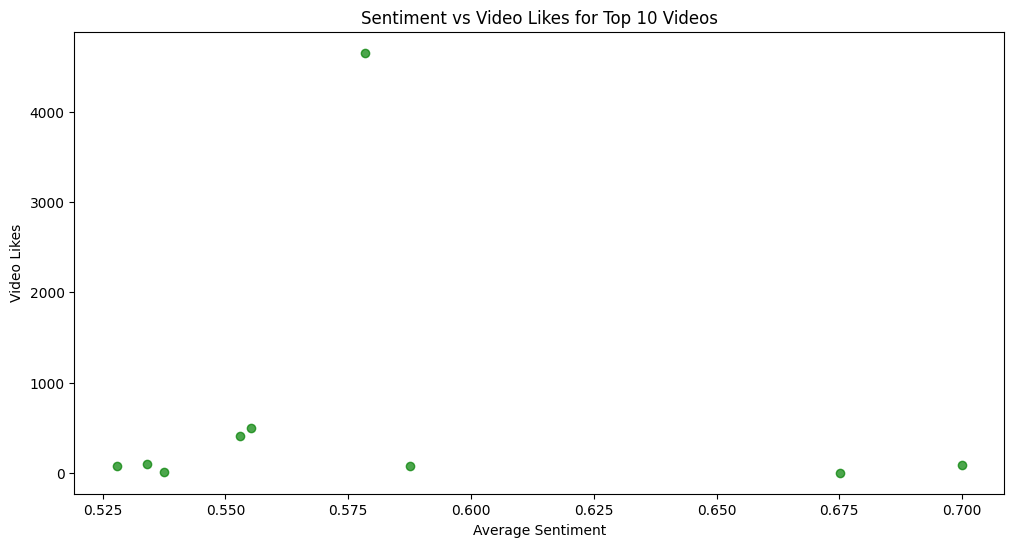

In [69]:
# 绘制情感得分和视频点赞数的散点图
plt.figure(figsize=(12, 6))
plt.scatter(top_10_videos['sentiment'], top_10_videos['total_likes'], color='green', alpha=0.7)
plt.title('Sentiment vs Video Likes for Top 10 Videos')
plt.xlabel('Average Sentiment')
plt.ylabel('Video Likes')
plt.show()

###### 情感分析的情感分类（Positive/Negative/Neutral）

根据情感得分将评论分类为正面（positive）、负面（negative）或中性（neutral），然后对这些类别进行分析。

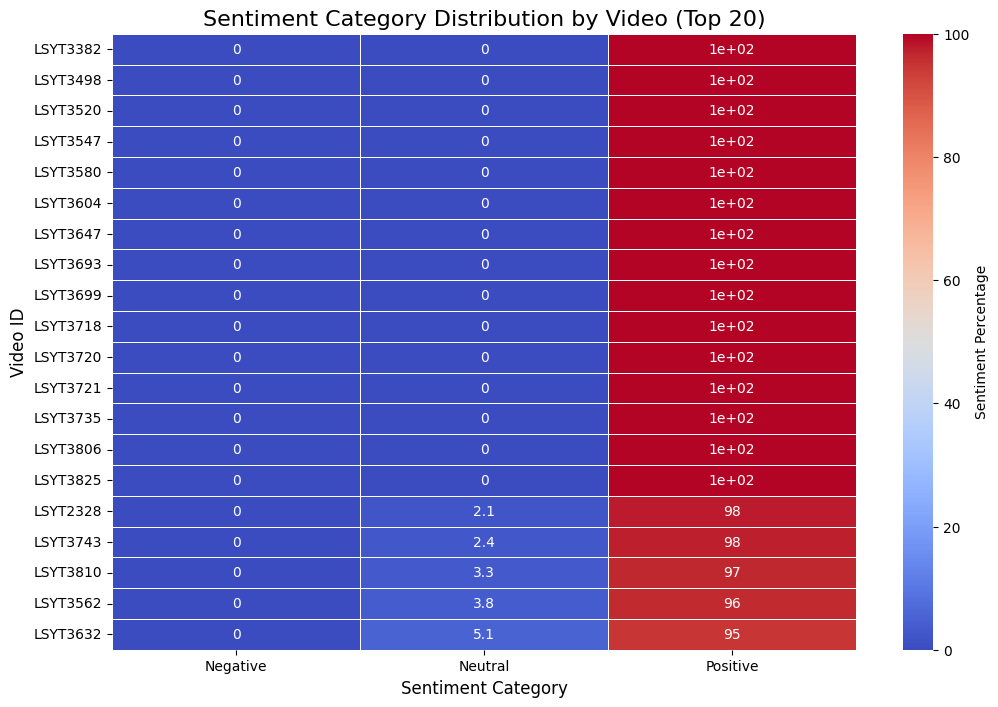

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 计算每个视频的情感分布（负面、中立、正面）
sentiment_counts = comments.groupby(['publish_number', 'sentiment_category']).size().unstack(fill_value=0)

# 计算每个视频情感分布的百分比
sentiment_percentage = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

# 选择评论数量较多的前20个视频（如果需要筛选）
top_videos = sentiment_percentage.nlargest(20, 'Positive')  # 根据“Positive”情感排序

# 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(top_videos, annot=True, cmap='coolwarm', cbar_kws={'label': 'Sentiment Percentage'}, linewidths=0.5)

plt.title('Sentiment Category Distribution by Video (Top 20)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Video ID', fontsize=12)
plt.show()